# Linear Regression

source: [Training a Simple Linear Regression Model From Scratch](https://utkuufuk.com/2018/04/21/linear-regression/)

### Load Data

city populations and the second column contains food truck profits in each city, both in 10,000s

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = np.loadtxt('data/food_truck_data.txt', delimiter=',')
x = data[:, 0] # city populations
y = data[:, 1] # food truck profits

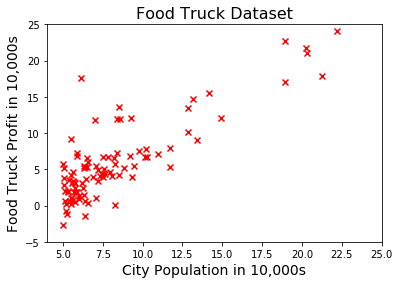

In [2]:
fig, ax = plt.subplots()
ax.scatter(x, y, marker="x", c="red")
plt.title("Food Truck Dataset", fontsize=16)
plt.xlabel("City Population in 10,000s", fontsize=14)
plt.ylabel("Food Truck Profit in 10,000s", fontsize=14)
plt.axis([4, 25, -5, 25])
fig;

Given a **feature vector**

$$x = \begin{pmatrix}1 \\ x_1\end{pmatrix}$$

and **model vector** $\theta$

$$\theta^\top = (\theta_0, \theta_1)$$

then the **hypothesis function** is

$$h_\theta(x)=\theta^\top x = \theta_0 + \theta_1 x_1$$

### Calculation

Define the **features matrix** $X$ as

$$X = \begin{pmatrix}1 & x_1^{(1)} \\ 1 & x_1^{(2)} \\ \vdots & \vdots \\ 1 & x_1^{(n)}\end{pmatrix}$$

In [3]:
X = np.ones(shape=(len(x), 2))   # set theta_0 = 1
X[:, 1] = x                      # set theta_1 = x
X.shape

(97, 2)

Initialize $\theta$ with zeros

In [4]:
theta = np.zeros(2).reshape(2,1)
theta.shape

(2, 1)

then we calculate the **hypothesis function vector** as

$$H_\theta(X) = X \cdot \theta$$

In [5]:
(X @ theta).shape

(97, 1)

Reshape $y$ values to a column vector:

In [6]:
Y = np.array(y).T.reshape(len(y),1)
Y.shape

(97, 1)

### Cost Function

The objective in training a linear regression model is to minimize a **cost function** $J(\theta)$, which measures the difference between actual $y$ values in the training sample and predictions made by the hypothesis function $h_\theta(x)$:

$$J(\theta) = \frac{1}{2n}\sum_i^n (h_\theta(x^{(i)}) - y^{(i)})^2$$

where $n$ is the number of training examples.

In [7]:
def cost(theta, X, Y):
    predictions = X @ theta
    squared_errors = np.square(predictions - Y)
    return np.sum(squared_errors) / (2 * len(Y))

In [8]:
cost(theta, X, Y)

32.072733877455676

## Gradient Descent

Since the hypothesis is based on the model parameters $\theta$, we must minimize the cost function $J(\theta)$. The gradient descent algorithm is an optimization algorithm for differentiable cost functions:

$$\theta_j = \theta_j - \alpha \frac{1}{n} \sum_i^n (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}$$

In [9]:
def gradient_descent(X, Y, alpha, num_iters):
    num_features = X.shape[1]               
    theta = np.zeros(num_features).reshape(2,1)          # initialize model parameters
    for n in range(num_iters):
        predictions = X @ theta                          # compute predictions based on the current hypothesis
        errors = predictions - Y
        gradient = X.T @ errors
        theta -= alpha * gradient / len(Y)               # update model parameters
    return theta                                         # return optimized parameters

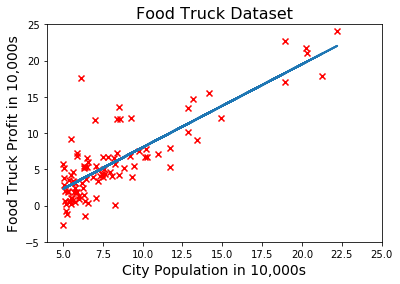

In [10]:
theta = gradient_descent(X, Y, 0.02, 600)                # run GD for 600 iterations with learning rate = 0.02
prediction = X @ theta                                   # prediction made by the optimized model
ax.plot(X[:, 1], prediction, linewidth=2)                # plot the hypothesis on top of the training data
fig

## Debugging

For checking accuracy, modify the gradient descent function to make it record the **cost** at the end of each iteration into a cost history array:

In [11]:
def gradient_descent_with_cost_history(X, Y, alpha, num_iters):
    cost_history = np.zeros(num_iters)                           # create a vector to store the cost history
    num_features = X.shape[1]               
    theta = np.zeros(num_features).reshape(2,1)
    for n in range(num_iters):
        predictions = X @ theta
        errors = predictions - Y
        gradient = X.T @ errors
        theta -= alpha * gradient / len(Y)
        cost_history[n] = cost(theta, X, Y)                      # compute and record the cost
    return theta, cost_history                                   # return optimized parameters and cost history

Plot cost $J(\theta)$ history for different **learning rates** $\alpha$:

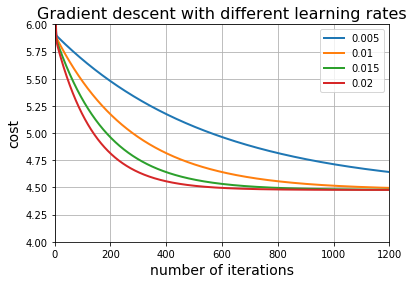

In [12]:
plt.figure()
num_iters = 1200
learning_rates = [0.005, 0.01, 0.015, 0.02]
for lr in learning_rates:
    _, cost_history = gradient_descent_with_cost_history(X, Y, lr, num_iters)
    plt.plot(cost_history, linewidth=2)
plt.title("Gradient descent with different learning rates", fontsize=16)
plt.xlabel("number of iterations", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.legend(list(map(str, learning_rates)))
plt.axis([0, num_iters, 4, 6])
plt.grid()

If we use a learnign rate of $\alpha = 0.025$, then the steps are too huge, so that the cost diverges instead of convergates:

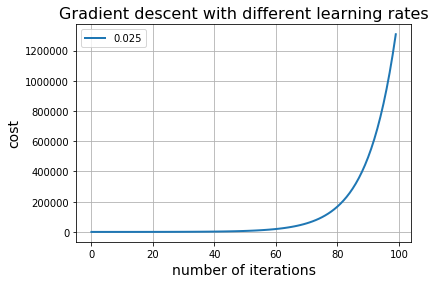

In [13]:
plt.figure()
num_iters = 100
learning_rates = [0.025]
for lr in learning_rates:
    _, cost_history = gradient_descent_with_cost_history(X, Y, lr, num_iters)
    plt.plot(cost_history, linewidth=2)
plt.title("Gradient descent with different learning rates", fontsize=16)
plt.xlabel("number of iterations", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.legend(list(map(str, learning_rates)))
#plt.axis([0, num_iters, 4, 6])
plt.grid()

## Prediction

we train the model with $\alpha = 0.02$ and redict the profit for a population of $x_1 = 70.000$:

In [14]:
theta = gradient_descent(X, Y, 0.02, 600)                        # train the model
test_example = np.array([1, 7])                                  # pick a city with 70,000 population as a test example
prediction = test_example @ theta                                # use the trained model to make a prediction

print('For population = 70,000, we predict a profit of $', prediction.item() * 10000);

For population = 70,000, we predict a profit of $ 45905.66217877413
